In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [31]:
ticker = "QCOM"
start = "2018-01-01"
end = "2023-10-31"

In [32]:
df = yf.download(ticker, start=start, end=end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,65.860001,66.139999,64.599998,65.400002,53.281544,9519800
2017-01-04,65.669998,65.949997,65.260002,65.470001,53.338585,6221700
2017-01-05,65.220001,65.980003,65.050003,65.550003,53.403759,5998900
2017-01-06,65.480003,65.870003,64.860001,65.529999,53.387463,6749400
2017-01-09,65.529999,66.269997,65.489998,65.650002,53.485229,4769200
...,...,...,...,...,...,...
2022-12-23,109.699997,110.919998,108.209999,110.839996,107.951469,5356700
2022-12-27,109.750000,110.690002,108.889999,109.459999,106.607430,6158100
2022-12-28,108.870003,110.269997,106.820000,106.970001,104.182327,5395600


In [33]:
data = df['Close']

scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))

In [34]:
training_data_len = int(len(data) * 0.8)
training_data = data[0:training_data_len, :]
testing_data = data[training_data_len:, :]

len(training_data), len(testing_data)

(1208, 302)

In [35]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [36]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=0)

In [37]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

10/10 [==============================] - 0s 5ms/step


In [38]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [10]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 1.3101082417030618
Root Mean Squared Error (RMSE): 2.0815276154111757


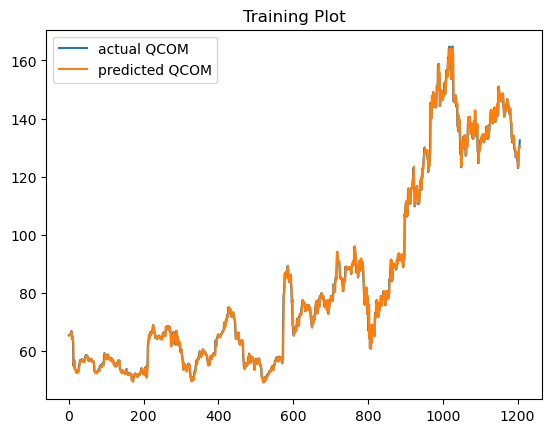

In [11]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 3.2834795067872724
Root Mean Squared Error (RMSE): 4.2684542600566875


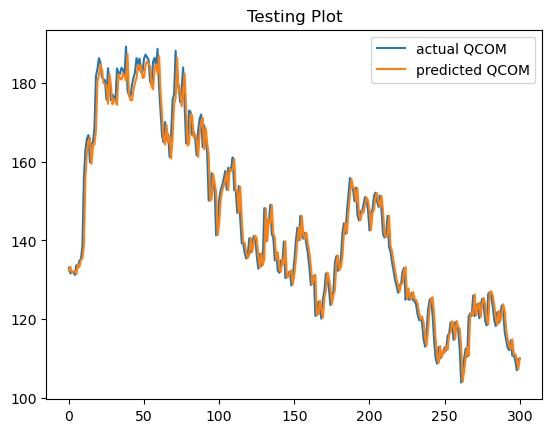

In [12]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

In [13]:
y_test[-1]

109.94000244140625

In [14]:
pred[-1]

array([110.10982], dtype=float32)

In [15]:
start_date = '2023-11-01'
end_date = '2023-12-08'
future_data = yf.download(ticker, start_date, end_date).reset_index()['Close']
future_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,111.349998,111.739998,107.129997,107.199997,106.549141,8110400
2023-01-04,109.800003,112.230003,108.809998,111.529999,110.852859,7614200
2023-01-05,109.930000,110.919998,109.129997,109.400002,108.735794,7546000
2023-01-06,110.959999,115.980003,110.050003,115.339996,114.639725,10259300
2023-01-09,116.730003,118.849998,113.540001,114.610001,113.914162,10291800
2023-01-10,114.019997,116.970001,113.720001,116.910004,116.200195,6384800
2023-01-11,117.440002,118.500000,115.169998,118.389999,117.671211,7374400
2023-01-12,119.239998,122.379997,117.650002,121.589996,120.851776,9527600
2023-01-13,119.820000,121.419998,119.720001,120.239998,119.509972,8040400


In [16]:
future_data = np.array(future_data['Close'])
len(future_data)

38

In [ ]:
model(april1) = (april2-pred) -> april2actual



model(april2-pred) = april3-pred

In [17]:
def predict_future(days, last_input, future_data):
    Output = []
    i = 0
    temp = scaler.transform(future_data.reshape(-1, 1))
    
    while(i<days):
        if(len(last_input)>past_values):
            last_input = last_input[1:]
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            last_input = last_input[1:]
            Output.extend(res.tolist())
            i=i+1
        else:
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            Output.extend(res.tolist())
            i=i+1
        
    Output = scaler.inverse_transform(Output)
    return Output, last_input
    
future_predictions, last_input = predict_future(len(future_data), X_test[-1], future_data)
future_predictions = future_predictions.flatten()

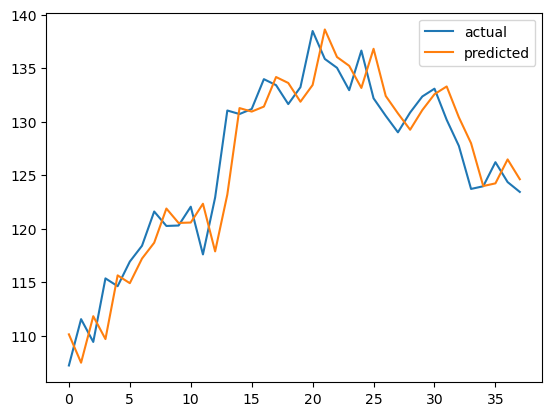

In [18]:
plt.plot(future_data, label = 'actual')
plt.plot(future_predictions, label = 'predicted')
plt.legend()
plt.show()

In [19]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [20]:
controls_actual = get_control_vector(future_data)
amount_actual = buy_and_sell_bot(future_data, controls_actual)

In [21]:
controls_pred= get_control_vector(future_predictions)
amount_pred = buy_and_sell_bot(future_predictions, controls_pred)

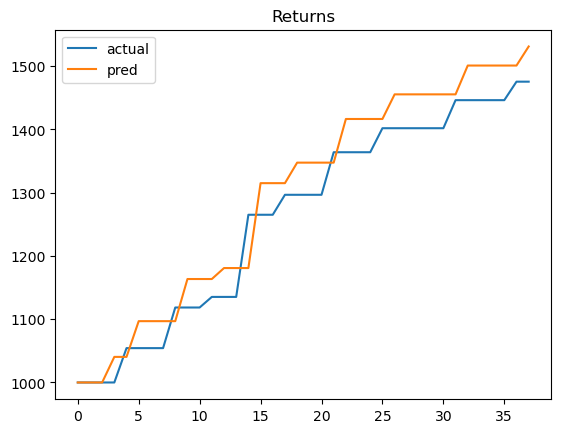

In [22]:
plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title("Returns")
plt.show()